In [41]:
# useful additional packages
import matplotlib.pyplot as plt
import networkx as nx
import time
from qiskit_optimization.applications import Maxcut
# General imports
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Pre-defined ansatz circuit, operator class and visualization tools
from qiskit.circuit.library import QAOAAnsatz

from qiskit import transpile
from qiskit_aer import AerSimulator
# from qiskit.visualization import plot_distribution
#from qiskit.quantum_info import SparsePauliOp
# Qiskit Runtime
# from qiskit_ibm_runtime import QiskitRuntimeService
# from qiskit_ibm_runtime import Estimator, Sampler, Session, Options

# SciPy minimizer routine
from scipy.optimize import minimize
from qiskit.visualization import plot_histogram
from qiskit.primitives import BackendEstimator, BackendSampler



In [42]:

def draw_graph(G, colors, pos):
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(G, node_color=colors, node_size=600, alpha=0.8, ax=default_axes, pos=pos)
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)

Problem name: Max-cut

Maximize
  -2*x_0*x_1 - 2*x_0*x_2 - 2*x_1*x_2 - 2*x_2*x_3 - 2*x_3*x_4 - 2*x_3*x_5
  - 2*x_4*x_5 + 2*x_0 + 2*x_1 + 3*x_2 + 3*x_3 + 2*x_4 + 2*x_5

Subject to
  No constraints

  Binary variables (6)
    x_0 x_1 x_2 x_3 x_4 x_5



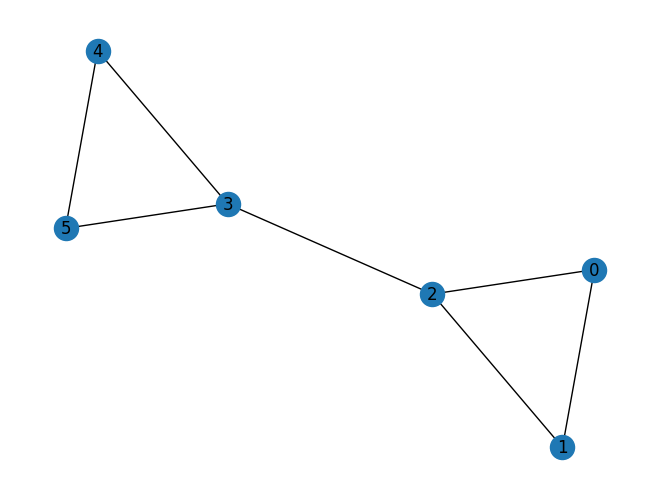

In [43]:
num_nodes = 6



# G = nx.random_regular_graph(d=3, n=num_nodes, seed=seed)
# nx.draw(G, with_labels=True, pos=nx.spring_layout(G, seed=seed))


G = nx.Graph()
G.add_edges_from([(0,1),(1,2),(2,0),(3,2),(4,3),(5,3),(4,5)])
nx.draw_spring(G, with_labels=True)
maxcut = Maxcut(G)
problem = maxcut.to_quadratic_program()
print(problem.prettyprint())

In [44]:
# Initialize the weight matrix
w = np.zeros((num_nodes, num_nodes))

# Iterate over the edges of the graph and assign weights to the weight matrix
for edge in G.edges():
    node1, node2 = edge
    w[node1][node2] = 1
    w[node2][node1] = 1  # Assuming undirected graph

# Print the weight matrix
#print("Weight Matrix:")
#print(w)

pos = nx.spring_layout(G)


Best solution = [1, 0, 0, 1, 0, 0] cost = 5.0

Best solution = [0, 1, 0, 1, 0, 0] cost = 5.0

Best solution = [1, 1, 0, 1, 0, 0] cost = 5.0

Best solution = [0, 0, 1, 0, 1, 0] cost = 5.0

Best solution = [1, 0, 1, 0, 1, 0] cost = 5.0

Best solution = [0, 1, 1, 0, 1, 0] cost = 5.0

Best solution = [1, 0, 0, 1, 1, 0] cost = 5.0

Best solution = [0, 1, 0, 1, 1, 0] cost = 5.0

Best solution = [1, 1, 0, 1, 1, 0] cost = 5.0

Best solution = [0, 0, 1, 0, 0, 1] cost = 5.0

Best solution = [1, 0, 1, 0, 0, 1] cost = 5.0

Best solution = [0, 1, 1, 0, 0, 1] cost = 5.0

Best solution = [1, 0, 0, 1, 0, 1] cost = 5.0

Best solution = [0, 1, 0, 1, 0, 1] cost = 5.0

Best solution = [1, 1, 0, 1, 0, 1] cost = 5.0

Best solution = [0, 0, 1, 0, 1, 1] cost = 5.0

Best solution = [1, 0, 1, 0, 1, 1] cost = 5.0

Best solution = [0, 1, 1, 0, 1, 1] cost = 5.0
elapsed time = 0.689622163772583 sec


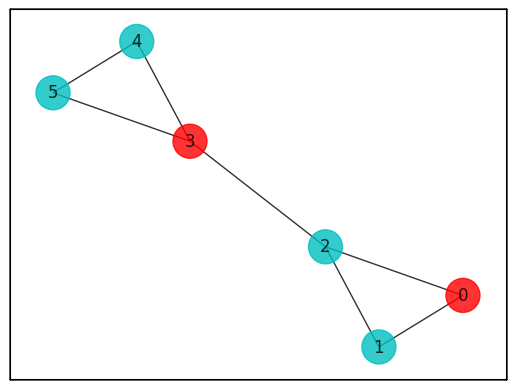

In [45]:
import itertools

tic = time.time()
best_cost_brute = 0
best_solutions_brute = []

for b in range(2 ** num_nodes):
    x = [int(t) for t in reversed(list(bin(b)[2:].zfill(num_nodes)))]
    cost = 0
    for i in range(num_nodes):
        for j in range(num_nodes):
            cost += w[i, j] * x[i] * (1 - x[j])
    if best_cost_brute < cost:
        best_cost_brute = cost
        best_solutions_brute = [x]
    elif best_cost_brute == cost:
        best_solutions_brute.append(x)

    #print("case = " + str(x) + " cost = " + str(cost))

for solution in best_solutions_brute:
    colors = ["r" if solution[i] == 0 else "c" for i in range(num_nodes)]
    draw_graph(G, colors, pos)
    print("\nBest solution = " + str(solution) + " cost = " + str(best_cost_brute))

toc = time.time()
print("elapsed time = " + str(toc - tic) + " sec")



Best solution = [1, 0, 0, 1, 0, 0] cost = 5.0

Best solution = [0, 1, 0, 1, 0, 0] cost = 5.0

Best solution = [1, 1, 0, 1, 0, 0] cost = 5.0

Best solution = [0, 0, 1, 0, 1, 0] cost = 5.0

Best solution = [1, 0, 1, 0, 1, 0] cost = 5.0

Best solution = [0, 1, 1, 0, 1, 0] cost = 5.0

Best solution = [1, 0, 0, 1, 1, 0] cost = 5.0

Best solution = [0, 1, 0, 1, 1, 0] cost = 5.0

Best solution = [1, 1, 0, 1, 1, 0] cost = 5.0

Best solution = [0, 0, 1, 0, 0, 1] cost = 5.0

Best solution = [1, 0, 1, 0, 0, 1] cost = 5.0

Best solution = [0, 1, 1, 0, 0, 1] cost = 5.0

Best solution = [1, 0, 0, 1, 0, 1] cost = 5.0

Best solution = [0, 1, 0, 1, 0, 1] cost = 5.0

Best solution = [1, 1, 0, 1, 0, 1] cost = 5.0

Best solution = [0, 0, 1, 0, 1, 1] cost = 5.0

Best solution = [1, 0, 1, 0, 1, 1] cost = 5.0

Best solution = [0, 1, 1, 0, 1, 1] cost = 5.0
elapsed time = 0.5764791965484619 sec
All possible best solutions: [[1, 0, 0, 1, 0, 0], [0, 1, 0, 1, 0, 0], [1, 1, 0, 1, 0, 0], [0, 0, 1, 0, 1, 0], [1, 0,

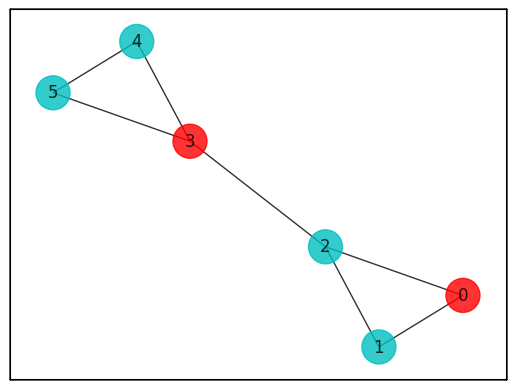

In [46]:
import itertools

tic = time.time()
best_cost_brute = 0
best_solutions_brute = []

for b in range(2 ** num_nodes):
    x = [int(t) for t in reversed(list(bin(b)[2:].zfill(num_nodes)))]
    cost = 0
    for i in range(num_nodes):
        for j in range(num_nodes):
            cost += w[i, j] * x[i] * (1 - x[j])
    if best_cost_brute < cost:
        best_cost_brute = cost
        best_solutions_brute = [x]
    elif best_cost_brute == cost:
        best_solutions_brute.append(x)

    #print("case = " + str(x) + " cost = " + str(cost))

for solution in best_solutions_brute:
    colors = ["r" if solution[i] == 0 else "c" for i in range(num_nodes)]
    draw_graph(G, colors, pos)
    print("\nBest solution = " + str(solution) + " cost = " + str(best_cost_brute))

toc = time.time()
print("elapsed time = " + str(toc - tic) + " sec")

# Append all possible best solutions to a list
all_best_solutions = []
for b in range(2 ** num_nodes):
    x = [int(t) for t in reversed(list(bin(b)[2:].zfill(num_nodes)))]
    cost = 0
    for i in range(num_nodes):
        for j in range(num_nodes):
            cost += w[i, j] * x[i] * (1 - x[j])
    if cost == best_cost_brute:
        all_best_solutions.append(x)

print("All possible best solutions:", all_best_solutions)


In [47]:
max_cut = Maxcut(G)
qp = max_cut.to_quadratic_program()
print(qp.prettyprint())

Problem name: Max-cut

Maximize
  -2*x_0*x_1 - 2*x_0*x_2 - 2*x_1*x_2 - 2*x_2*x_3 - 2*x_3*x_4 - 2*x_3*x_5
  - 2*x_4*x_5 + 2*x_0 + 2*x_1 + 3*x_2 + 3*x_3 + 2*x_4 + 2*x_5

Subject to
  No constraints

  Binary variables (6)
    x_0 x_1 x_2 x_3 x_4 x_5



In [48]:
qubitOp, offset = qp.to_ising()
print("Offset:", offset)
print("Ising Hamiltonian:")
print(str(qubitOp))

Offset: -3.5
Ising Hamiltonian:
SparsePauliOp(['IIIIZZ', 'IIIZIZ', 'IIIZZI', 'IIZZII', 'IZZIII', 'ZIZIII', 'ZZIIII'],
              coeffs=[0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j])


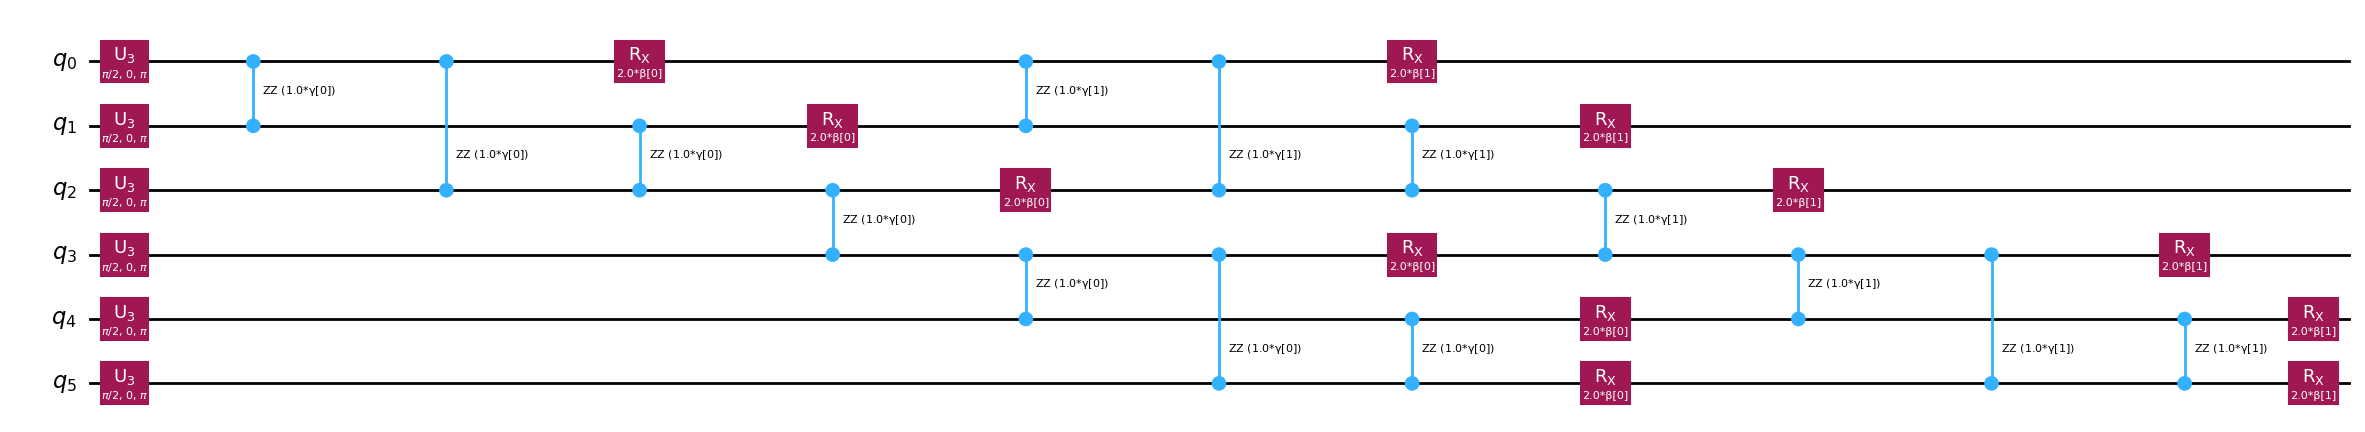

In [49]:
# QAOA ansatz circuit
ansatz = QAOAAnsatz(qubitOp, reps=2)

# the reps in decompose means, the number of times the circuit should be decomposed
# for example reps = 2 means circuit.decompise().decompose()
ansatz.decompose(reps=3).draw(output="mpl", style="iqp",fold=-1)

In [50]:
print(f"Number of Qubits: {ansatz.num_qubits}")
print(f"Number of Parameters: {ansatz.num_parameters}")


Number of Qubits: 6
Number of Parameters: 4


In [51]:
x0 = 2 * np.pi * np.random.rand(ansatz.num_parameters)
print(x0)

[6.06702526 5.75713834 5.55085134 0.00633977]


In [52]:
print(qubitOp)

SparsePauliOp(['IIIIZZ', 'IIIZIZ', 'IIIZZI', 'IIZZII', 'IZZIII', 'ZIZIII', 'ZZIIII'],
              coeffs=[0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j])


In [53]:
from qiskit.quantum_info import PauliList
observables = PauliList(['IIIIZZ', 'IIIZIZ', 'IIIZZI', 'IIZZII', 'IZZIII', 'ZIZIII', 'ZZIIII'])
print(observables)

['IIIIZZ', 'IIIZIZ', 'IIIZZI', 'IIZZII', 'IZZIII', 'ZIZIII', 'ZZIIII']


In [54]:
from gate_cut import *

In [55]:
tic = time.time()
expectation = get_expectation(ansatz,"AAABBB",observables)
res = minimize(expectation,x0,method= 'POWELL',options={'maxiter': 1000})
print(res)
toc = time.time()
print("elapsed time = " + str(toc - tic) + " sec")

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -0.35035481250001116
       x: [ 7.060e+00  5.696e+00  5.571e+00  1.804e-02]
     nit: 2
   direc: [[ 1.000e+00  0.000e+00  0.000e+00  0.000e+00]
           [ 0.000e+00  1.000e+00  0.000e+00  0.000e+00]
           [ 0.000e+00  0.000e+00  1.000e+00  0.000e+00]
           [ 0.000e+00  0.000e+00  0.000e+00  1.000e+00]]
    nfev: 158
elapsed time = 21885.717646598816 sec


In [56]:
print(res.x)

[7.06008063 5.69638587 5.57145176 0.0180406 ]


In [57]:
ansatz = QAOAAnsatz(qubitOp, reps=2)
circuit = ansatz.assign_parameters(res.x)
sampler = BackendSampler(backend=AerSimulator(method="statevector"))
circuit.measure_all()
samp_dist = sampler.run(circuit).result().quasi_dists[0]
my_dict = dict(sorted(samp_dist.binary_probabilities().items(),key=lambda item: item[1], reverse=True))
print(my_dict)



{'101001': 0.0439453125, '001001': 0.04296875, '001010': 0.0390625, '011010': 0.0390625, '011001': 0.0380859375, '100110': 0.037109375, '010110': 0.0361328125, '101010': 0.03515625, '100101': 0.0322265625, '010100': 0.03125, '010101': 0.029296875, '101011': 0.029296875, '011100': 0.0263671875, '010011': 0.0263671875, '110101': 0.025390625, '100100': 0.025390625, '110001': 0.025390625, '110110': 0.0244140625, '011011': 0.0234375, '010001': 0.0234375, '001110': 0.0224609375, '110100': 0.021484375, '110011': 0.021484375, '101100': 0.0205078125, '001011': 0.017578125, '001100': 0.017578125, '101101': 0.0166015625, '100011': 0.015625, '101110': 0.015625, '001101': 0.0146484375, '100001': 0.013671875, '011110': 0.013671875, '011101': 0.013671875, '010010': 0.0126953125, '100010': 0.0126953125, '110010': 0.0126953125, '011000': 0.0078125, '111100': 0.005859375, '001111': 0.005859375, '010111': 0.005859375, '000110': 0.005859375, '101000': 0.005859375, '110000': 0.0048828125, '000101': 0.00488

In [58]:
print(all_best_solutions)

[[1, 0, 0, 1, 0, 0], [0, 1, 0, 1, 0, 0], [1, 1, 0, 1, 0, 0], [0, 0, 1, 0, 1, 0], [1, 0, 1, 0, 1, 0], [0, 1, 1, 0, 1, 0], [1, 0, 0, 1, 1, 0], [0, 1, 0, 1, 1, 0], [1, 1, 0, 1, 1, 0], [0, 0, 1, 0, 0, 1], [1, 0, 1, 0, 0, 1], [0, 1, 1, 0, 0, 1], [1, 0, 0, 1, 0, 1], [0, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1], [0, 0, 1, 0, 1, 1], [1, 0, 1, 0, 1, 1], [0, 1, 1, 0, 1, 1]]


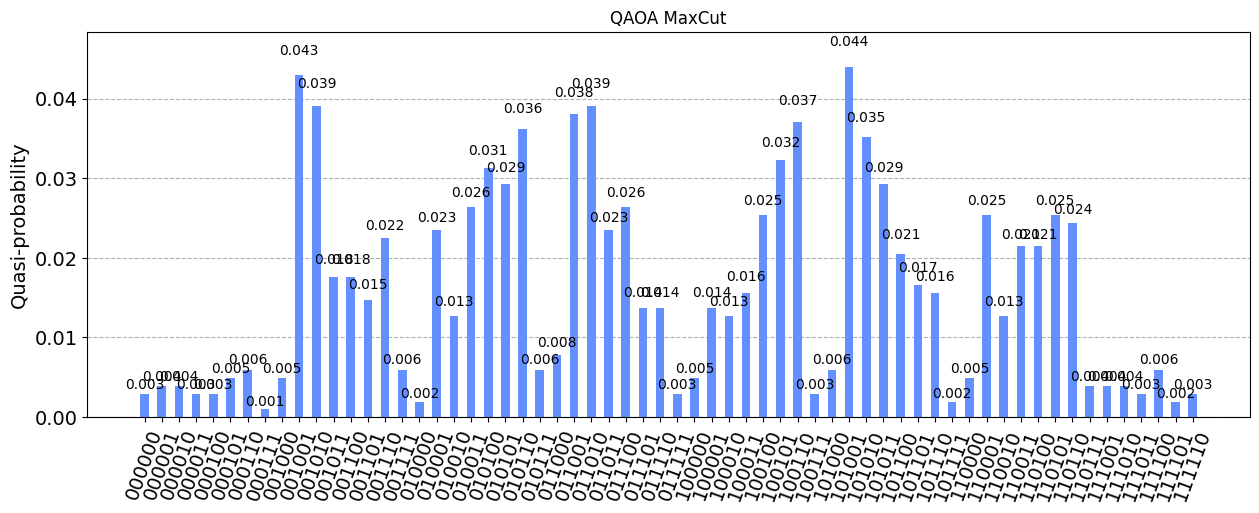

In [59]:
plot_histogram(my_dict, title="QAOA MaxCut",bar_labels=True, figsize=(15, 5))